<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/cl_xg_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![](https://lentiq.com/assets/images/logos/dmlc-xgboost-logo.svg)

# **Clasificación**

https://xgboost.ai/about

https://xgboost.readthedocs.io/en/stable/

# **XGBoost**

**XGBoost es el acrónimo de Extreme Gradient Boosting y se ha convertido en un referente dentro del ámbito de aprendizaje automáticos.**

## **Actualizando los módulos necesarios**

In [1]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Carga de librerías necesarias**

### **Para análisis de datos**

In [3]:
import pandas as pd #para la creación del dataframe y limpieza de los datos
import numpy as np

### **Para el desarrollo del modelo**

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
import sklearn #para los algoritmos de aprendizaje automático
import sklearn.metrics as metrics #para la medición de los algoritmos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import pickle #para grabar y recuperar los modelos entrenados

### **Para graficos**

In [5]:
import matplotlib.pyplot as plt #librería gráfica básica
from sklearn.tree import plot_tree

## **Ingeniería de las características de los Datos**

### **Extracción de Datos - Creación del DataFrame**

In [6]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"

In [7]:
archivo = "Clientes.csv"

In [8]:
clientes = pd.read_csv(url+archivo) #los datos están separados por comas
clientes #vista del dataframe

,ID,Trabajo,Edad,Salario,Compra
0,15624510,1,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Si
396,15706071,1,51,23000,Si
397,15654296,0,50,20000,Si
398,15755018,1,36,33000,No


**El dataframe contiene 5 variables y 400 observaciones.**

**Las variables indican:**
- **ID:** La identificación del cliente
- **Trabajo:** Corresponde 1 cuando es Dependiente y 0 cuando es Independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

**El problema a resolver es con los datos historicos (entrenamiento) predecir en virtud de las variables independientes, si un cliente va a efectuar una compra.**

### **Selección de características**

In [9]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Podemos constatar que no hay valores nulos, ya que todas las columnas tienen la misma cantidad de datos, pero lo que no podemos constatar es si hay valores duplicados...**

In [10]:
clientes.drop_duplicates(inplace=True)
clientes.shape

(400, 5)

**Ahora vamos a eliminar la variable o columna que no es pertinente para el problema planteado...**

In [11]:
clientes = clientes.drop(columns=["ID"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Trabajo,Edad,Salario,Compra
0,1,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Si
396,1,51,23000,Si
397,0,50,20000,Si
398,1,36,33000,No


## **División del dataframe**

**Primero se divide el dataframe en variable objetivo $y$ con la columna que contiene los datos etiquetados por un lado, y en vector de entrada de los datos $X=$ con las variables restantes (variables independientes).**

In [12]:
y = clientes["Compra"] #se define la variable objetivo
X = clientes.drop(columns=["Compra"]) #se elimina la variable objetivo del vector de entrada

In [13]:
y #visualizando la variable objetivo

0      No
1      No
2      No
3      No
4      No
       ..
395    Si
396    Si
397    Si
398    No
399    Si
Name: Compra, Length: 400, dtype: object

In [14]:
X #visualizando el vector de entrada

,Trabajo,Edad,Salario
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


**Ahora se divide la variable objetivo $y$ en un conjunto de datos de entrenamiento (train) y prueba (test). Lo mismo se realiza para el vector de entrada de los datos $X$.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**La proporcion es 75% para entrenamiento y 25% para prueba**

In [16]:
X_train.shape

(300, 3)

**De las 400 observaciones del vector de entrada de datos, 300 observaciones son de entrenamiento**

In [17]:
X_test.shape

(100, 3)

**De las 400 observaciones del vector de entrada de datos, 100 observaciones son de prueba**

In [18]:
y_train.shape

(300,)

**De las 400 observaciones de la variable objetivo, 300 observaciones son de entrenamiento**

In [19]:
y_test.shape

(100,)

**De las 400 observaciones de la variable objetivo, 100 observaciones son de prueba**

## **Escala del vector de entrada**

In [20]:
#normalizacion = StandardScaler()

In [21]:
#X_train = normalizacion.fit_transform(X_train)
#X_test = normalizacion.transform(X_test)

# **Evaluando los Algoritmos**

## **Algoritmo XGBoost**

In [22]:
XGBoost = XGBClassifier()

In [23]:
XGBoost.fit(X_train, y_train)

XGBClassifier()

In [24]:
XGBoost = XGBoost.fit(X_train, y_train)

In [26]:
y_pred_XGBoost = XGBoost.predict(X_test)

In [27]:
mc = metrics.confusion_matrix(y_test, y_pred_XGBoost)
print(mc)

[[64  4]
 [ 3 29]]


In [28]:
cm = confusion_matrix(y_test, y_pred_XGBoost, labels=XGBoost.classes_)

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost.classes_)

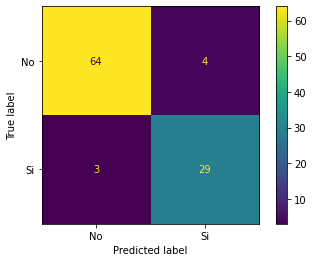

In [30]:
disp.plot();

In [31]:
reporte = metrics.classification_report(y_test, y_pred_XGBoost)
print(reporte)

              precision    recall  f1-score   support

          No       0.96      0.94      0.95        68
          Si       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### **Guardando el modelo**

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_XGBoost.pkl"

In [34]:
file = open(path, "wb")
pickle.dump(XGBoost, file)

### **Leyendo el modelo**

In [36]:
file = open(path, "rb")
modelo_XGBoost = pickle.load(file)

### **Visualización**

https://xgboost.readthedocs.io/en/stable/python/python_api.html?highlight=plot#xgboost.plot_tree

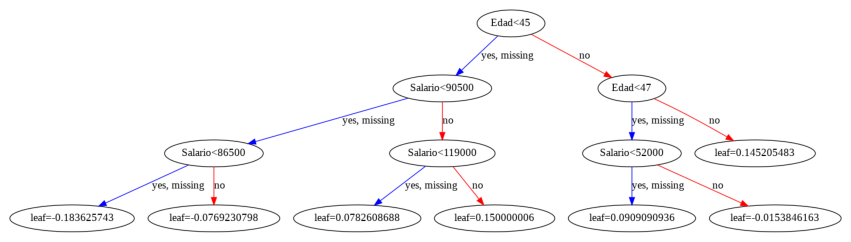

In [40]:
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_tree(modelo_XGBoost, ax=ax);

### **Predicción**

In [41]:
X_test

,Trabajo,Edad,Salario
132,1,30,87000
309,0,38,50000
341,1,35,75000
196,0,30,79000
246,0,35,50000
...,...,...,...
146,0,27,96000
135,1,23,63000
390,1,48,33000
264,1,48,90000


In [42]:
prediccion_XGBoost = modelo_XGBoost.predict(X_test)

In [43]:
print(prediccion_XGBoost)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'No' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No'
 'No' 'No' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'No'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'Si'
 'Si' 'Si']


In [44]:
X_test["Compra"] = y_test
X_test

,Trabajo,Edad,Salario,Compra
132,1,30,87000,No
309,0,38,50000,No
341,1,35,75000,No
196,0,30,79000,No
246,0,35,50000,No
...,...,...,...,...
146,0,27,96000,Si
135,1,23,63000,No
390,1,48,33000,Si
264,1,48,90000,Si


In [45]:
X_test["Prediccion"] = prediccion_XGBoost
X_test

,Trabajo,Edad,Salario,Compra,Prediccion
132,1,30,87000,No,No
309,0,38,50000,No,No
341,1,35,75000,No,No
196,0,30,79000,No,No
246,0,35,50000,No,No
...,...,...,...,...,...
146,0,27,96000,Si,No
135,1,23,63000,No,No
390,1,48,33000,Si,Si
264,1,48,90000,Si,Si
